### | Turbine Status Detector |

In [6]:
#importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import random
from tqdm import tqdm
import random
from PIL import Image
import tensorflow as tf
from keras.layers import concatenate
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
warnings.filterwarnings('ignore')


In [2]:
#Load the dataset
BASE_DIR = "E://College Lab Work//MINOR PROJECT//Level - 1//Image Data//Turbine Pics//"


In [3]:
image_paths = []
status_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    status = str(temp[0])
    image_paths.append(image_path)

    if status=='Damaged':
        status_labels.append(1)
    else:
        status_labels.append(0)

100%|██████████| 35/35 [00:00<?, ?it/s]


In [8]:
#convert to DataFrame
df = pd.DataFrame()
df['Image'], df['Status'] = image_paths, status_labels
df

,Image,Status
0,E://College Lab Work//MINOR PROJECT//Level - 1...,1
1,E://College Lab Work//MINOR PROJECT//Level - 1...,1
2,E://College Lab Work//MINOR PROJECT//Level - 1...,1
3,E://College Lab Work//MINOR PROJECT//Level - 1...,1
4,E://College Lab Work//MINOR PROJECT//Level - 1...,1
5,E://College Lab Work//MINOR PROJECT//Level - 1...,1
6,E://College Lab Work//MINOR PROJECT//Level - 1...,1
7,E://College Lab Work//MINOR PROJECT//Level - 1...,1
8,E://College Lab Work//MINOR PROJECT//Level - 1...,1
9,E://College Lab Work//MINOR PROJECT//Level - 1...,1


In [9]:
df = pd.read_csv('Image_data.csv')

In [10]:
df[df['Status'] == 0].count()

Image           17
Status          17
Damage Level    17
dtype: int64

In [32]:
df.head()

,Image,Status,Damage Level
0,E://College Lab Work//MINOR PROJECT//Level - 1...,1,3
1,E://College Lab Work//MINOR PROJECT//Level - 1...,1,4
2,E://College Lab Work//MINOR PROJECT//Level - 1...,1,5
3,E://College Lab Work//MINOR PROJECT//Level - 1...,1,3
4,E://College Lab Work//MINOR PROJECT//Level - 1...,1,5


## Feature Extraction


In [11]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [12]:
X = extract_features(df['Image'])

100%|██████████| 35/35 [00:00<00:00, 165.70it/s]


In [13]:
X.shape

(35, 128, 128, 1)

In [14]:
# normalize the images
X = X/255.0

In [16]:
Y_status = df['Status']
Y_damage = df['Damage Level']

In [17]:
input_shape = (128, 128, 1)

## | Model Creation |

In [33]:
inputs = Input(shape=input_shape)
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

flatten = Flatten()(maxp_4)


# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='status_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='damage_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])


## Training

In [34]:
# train model
history = model.fit(x=X, y=[Y_status,Y_damage], batch_size=32, epochs=50, validation_split=0.2)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 2.7705 - status_out_loss: 0.6959 - damage_out_loss: 2.0746 - status_out_accuracy: 0.4286 - damage_out_accuracy: 0.3571 - val_loss: 2.9950 - val_status_out_loss: 1.6399 - val_damage_out_loss: 1.3552 - val_status_out_accuracy: 0.0000e+00 - val_damage_out_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 283ms/step - loss: 2.4053 - status_out_loss: 0.7085 - damage_out_loss: 1.6967 - status_out_accuracy: 0.6429 - damage_out_accuracy: 0.0714 - val_loss: 5.1246 - val_status_out_loss: 0.8110 - val_damage_out_loss: 4.3136 - val_status_out_accuracy: 0.0000e+00 - val_damage_out_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 273ms/step - loss: 3.2472 - status_out_loss: 0.6169 - damage_out_loss: 2.6304 - status_out_accuracy: 0.6071 - damage_out_accuracy: 0.0714 - val_loss: 2.0085 - val_status_out_loss: 0.9288 - val_damage_out_loss: 1.0797 - val_status_out_accuracy: 0.0000e+00 - v

<Figure size 640x480 with 0 Axes>

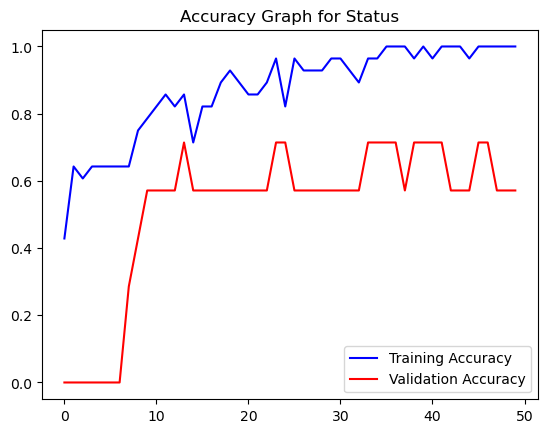

<Figure size 640x480 with 0 Axes>

In [35]:
#plot results for status
acc = history.history['status_out_accuracy']
val_acc = history.history['val_status_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph for Status')
plt.legend()
plt.figure()

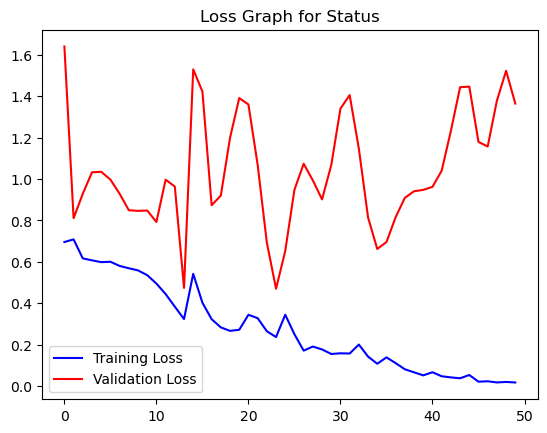

In [36]:
loss = history.history['status_out_loss']
val_loss = history.history['val_status_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph for Status')
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

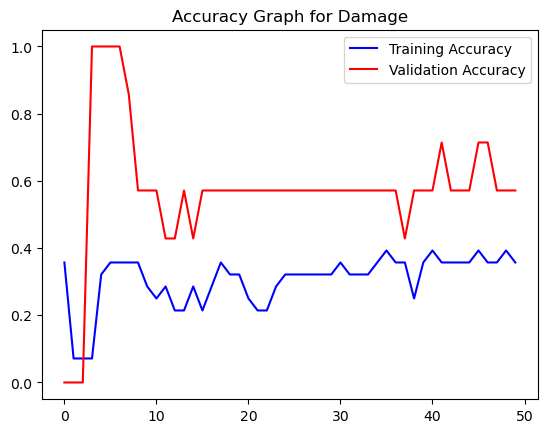

<Figure size 640x480 with 0 Axes>

In [37]:
#plot results for damage
acc = history.history['damage_out_accuracy']
val_acc = history.history['val_damage_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph for Damage')
plt.legend()
plt.figure()

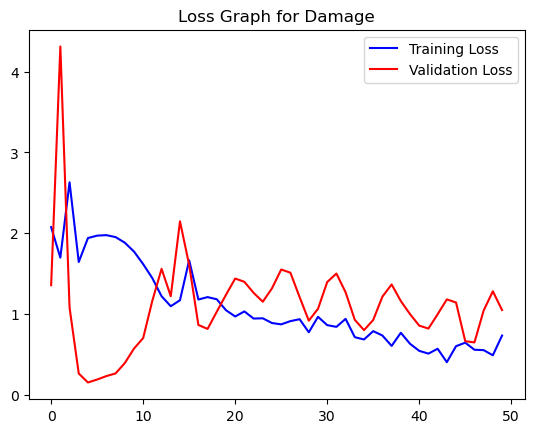

In [38]:
#plot results for Damage
loss = history.history['damage_out_loss']
val_loss = history.history['val_damage_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph for Damage')
plt.legend()
plt.show()

## Predict with Training Data

Original Status :  Damaged
Original Damage Level :  4
1/1 [==============================] - 0s 108ms/step
Predicted Status :  Damaged
Predicted Damage Level :  [4.6]


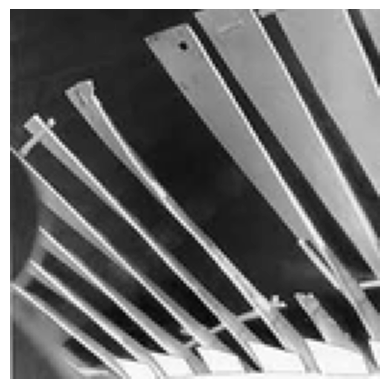

In [39]:
import math
image_index = 12

if Y_status[image_index] == 1:
    print('Original Status : ', 'Damaged')
else:
    print('Original Status : ', 'Undamaged')
print("Original Damage Level : ", Y_damage[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_status = np.round(pred[0][0], 1)
pred_damage_level = np.round(pred[1][0], 1)

threshold = 0.5
predicted_class = 1 if pred[0][0] >= threshold else 0

if predicted_class == 1:
    print("Predicted Status : ", 'Damaged')
else:
    print("Predicted Status : ", 'Undamaged')
print("Predicted Damage Level : ", pred_damage_level)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray')

Original Status :  Undamaged
Original Damage Level :  0
1/1 [==============================] - 0s 25ms/step
Predicted Status :  Undamaged
Predicted Damage Level :  [0.]


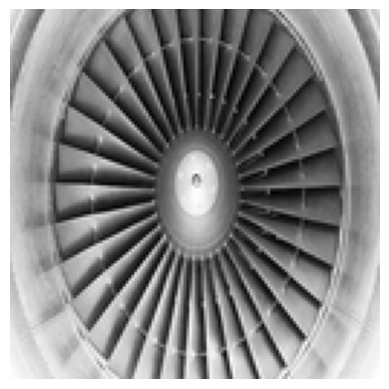

In [40]:
import math
image_index = 20

if Y_status[image_index] == 1:
    print('Original Status : ', 'Damaged')
else:
    print('Original Status : ', 'Undamaged')
print("Original Damage Level : ", Y_damage[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_status = np.round(pred[0][0], 1)
pred_damage_level = np.round(pred[1][0], 1)

threshold = 0.5
predicted_class = 1 if pred[0][0] >= threshold else 0

if predicted_class == 1:
    print("Predicted Status : ", 'Damaged')
else:
    print("Predicted Status : ", 'Undamaged')
print("Predicted Damage Level : ", pred_damage_level)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray')


## Prediction on Testing Data

Original Status :  Damaged
Original Damage Level :  2
1/1 [==============================] - 0s 22ms/step
Predicted Status :  Damaged
Predicted Damage Level :  [3.9]


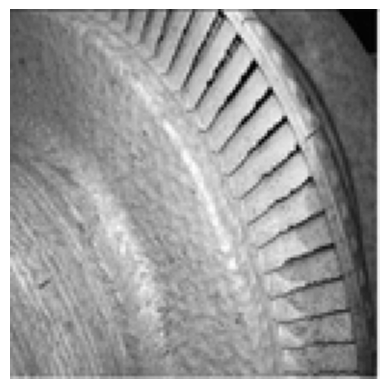

In [43]:
import math
image_index = 7

if Y_status[image_index] == 1:
    print('Original Status : ', 'Damaged')
else:
    print('Original Status : ', 'Undamaged')
print("Original Damage Level : ", Y_damage[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_status = np.round(pred[0][0], 1)
pred_damage_level = np.round(pred[1][0], 1)

threshold = 0.5
predicted_class = 1 if pred[0][0] >= threshold else 0

if predicted_class == 1:
    print("Predicted Status : ", 'Damaged')
else:
    print("Predicted Status : ", 'Undamaged')
print("Predicted Damage Level : ", pred_damage_level)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray')
